<a href="https://colab.research.google.com/github/veranery/AnalisedadosMusicais/blob/main/An%C3%A1liseDeDadosMusicais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
dados = pd.read_csv('MusicData.csv')
dados

,index,Format,Metric,Year,Number of Records,Value (Actual)
0,0,CD,Units,1973,1,NaN
1,1,CD,Units,1974,1,NaN
2,2,CD,Units,1975,1,NaN
3,3,CD,Units,1976,1,NaN
4,4,CD,Units,1977,1,NaN
...,...,...,...,...,...,...
3003,3003,Vinyl Single,Value (Adjusted),2015,1,6.205390
3004,3004,Vinyl Single,Value (Adjusted),2016,1,5.198931
3005,3005,Vinyl Single,Value (Adjusted),2017,1,6.339678
3006,3006,Vinyl Single,Value (Adjusted),2018,1,5.386197


In [185]:
dados = dados.rename(columns={'Format': 'Formato'})
dados = dados.rename(columns={'Metric': 'Metrica'})
dados = dados.rename(columns={'Year': 'Ano'})
dados = dados.rename(columns={'Number of Records': 'Números de recordes'})
dados = dados.rename(columns={'Value (Actual)': 'Valor'})
dados

,index,Formato,Metrica,Ano,Números de recordes,Valor
0,0,CD,Units,1973,1,NaN
1,1,CD,Units,1974,1,NaN
2,2,CD,Units,1975,1,NaN
3,3,CD,Units,1976,1,NaN
4,4,CD,Units,1977,1,NaN
...,...,...,...,...,...,...
3003,3003,Vinyl Single,Value (Adjusted),2015,1,6.205390
3004,3004,Vinyl Single,Value (Adjusted),2016,1,5.198931
3005,3005,Vinyl Single,Value (Adjusted),2017,1,6.339678
3006,3006,Vinyl Single,Value (Adjusted),2018,1,5.386197


In [186]:
dados = dados.drop('index', axis=1)


In [187]:
dados.fillna(0)

,Formato,Metrica,Ano,Números de recordes,Valor
0,CD,Units,1973,1,0.000000
1,CD,Units,1974,1,0.000000
2,CD,Units,1975,1,0.000000
3,CD,Units,1976,1,0.000000
4,CD,Units,1977,1,0.000000
...,...,...,...,...,...
3003,Vinyl Single,Value (Adjusted),2015,1,6.205390
3004,Vinyl Single,Value (Adjusted),2016,1,5.198931
3005,Vinyl Single,Value (Adjusted),2017,1,6.339678
3006,Vinyl Single,Value (Adjusted),2018,1,5.386197


In [188]:
dados_populares = dados[['Formato', 'Valor']]
dados_populares.fillna(0)

,Formato,Valor
0,CD,0.000000
1,CD,0.000000
2,CD,0.000000
3,CD,0.000000
4,CD,0.000000
...,...,...
3003,Vinyl Single,6.205390
3004,Vinyl Single,5.198931
3005,Vinyl Single,6.339678
3006,Vinyl Single,5.386197


Você pode comparar a popularidade de diferentes formatos ao longo do tempo com base nas unidades vendidas/receita gerada. (sugestão do exercício)

Resposta: Se for metrificar a popularidade com base em vendas, o formato de CD se encontra como o mais popular.

<ipython-input-189-e7af30778c13>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




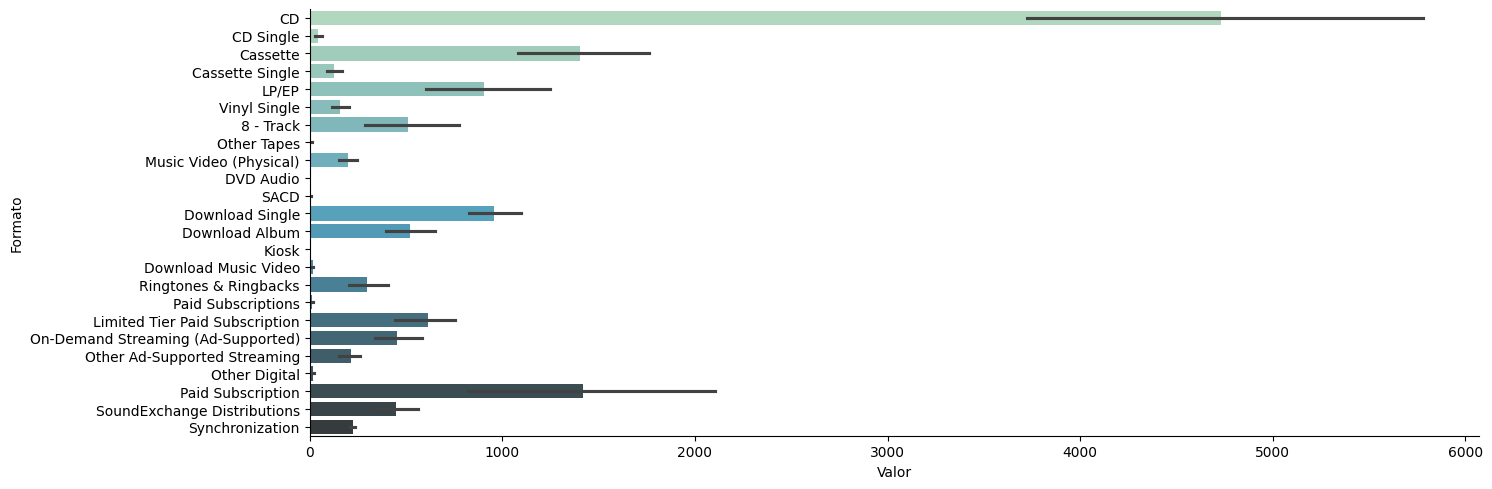

In [189]:
sns.catplot(x = 'Valor', y = "Formato", kind= "bar", data = dados_populares, aspect = 3,
    palette = "GnBu_d")

In [190]:
from plotly.express import histogram
histogram(data_frame=dados[dados['Metrica'] == 'Units'], x='Ano', y='Valor', color='Formato',
          height=600, nbins=dados['Ano'].nunique()).show()



In [191]:
#Gráfico das métrica de "Valores" e "Valores ajustado"
histogram(data_frame = dados[dados['Metrica'] != 'Units'], x='Ano', y='Valor', color='Formato',
          height=600, nbins=dados['Ano'].nunique(), ).show()

Explore como os formatos digitais influenciaram as vendas de formatos físicos ao longo do tempo.

Entenda quais formatos tiveram crescimento ou declínio em anos específicos.

In [192]:
#separar fisicos de digitais parar comparar os gráficos separados e analisar se há alguma interferência
dados['Formato'].unique()

array(['CD', 'CD Single', 'Cassette', 'Cassette Single', 'LP/EP',
       'Vinyl Single', '8 - Track', 'Other Tapes',
       'Music Video (Physical)', 'DVD Audio', 'SACD', 'Download Single',
       'Download Album', 'Kiosk', 'Download Music Video',
       'Ringtones & Ringbacks', 'Paid Subscriptions',
       'Limited Tier Paid Subscription',
       'On-Demand Streaming (Ad-Supported)',
       'Other Ad-Supported Streaming', 'Other Digital',
       'Paid Subscription', 'SoundExchange Distributions',
       'Synchronization'], dtype=object)

In [193]:
fisicos = ['CD', 'CD Single', 'Cassette', 'Cassette Single', 'LP/EP',
       'Vinyl Single', '8 - Track', 'Other Tapes',
       'Music Video (Physical)', 'DVD Audio', 'SACD', 'Kiosk']
digitais = ['Download Single',
       'Download Album', 'Download Music Video',
       'Ringtones & Ringbacks', 'Paid Subscriptions',
       'Limited Tier Paid Subscription',
       'On-Demand Streaming (Ad-Supported)',
       'Other Ad-Supported Streaming', 'Other Digital',
       'Paid Subscription', 'SoundExchange Distributions',
       'Synchronization']

In [194]:
dados_fisicos = dados.query('@fisicos in Formato')
dados_fisicos.fillna(0)

,Formato,Metrica,Ano,Números de recordes,Valor
0,CD,Units,1973,1,0.000000
1,CD,Units,1974,1,0.000000
2,CD,Units,1975,1,0.000000
3,CD,Units,1976,1,0.000000
4,CD,Units,1977,1,0.000000
...,...,...,...,...,...
3003,Vinyl Single,Value (Adjusted),2015,1,6.205390
3004,Vinyl Single,Value (Adjusted),2016,1,5.198931
3005,Vinyl Single,Value (Adjusted),2017,1,6.339678
3006,Vinyl Single,Value (Adjusted),2018,1,5.386197


In [195]:
#Evolução do formato ao longo dos anos
histogram(data_frame = dados_fisicos, x='Ano', y='Valor', color='Formato',
          height=600, nbins=dados['Ano'].nunique(), ).show()

In [196]:
dados_digitais = dados.query('@digitais in Formato')
dados_digitais.fillna(0)

,Formato,Metrica,Ano,Números de recordes,Valor
517,Download Single,Units,1973,1,0.000000
518,Download Single,Units,1974,1,0.000000
519,Download Single,Units,1975,1,0.000000
520,Download Single,Units,1976,1,0.000000
521,Download Single,Units,1977,1,0.000000
...,...,...,...,...,...
2956,Synchronization,Value (Adjusted),2015,1,218.894529
2957,Synchronization,Value (Adjusted),2016,1,228.847860
2958,Synchronization,Value (Adjusted),2017,1,242.063251
2959,Synchronization,Value (Adjusted),2018,1,290.686929


In [197]:
histogram(data_frame = dados_digitais, x='Ano', y='Valor', color='Formato',
          height=600, nbins=dados['Ano'].nunique(), ).show()


###Questão:
~Análise de Tendências: O conjunto de dados pode ser usado para analisar a tendência de vendas de diferentes formatos musicais ao longo de um período de 40 anos. Pode ajudar a identificar quais formatos ganharam ou perderam popularidade ao longo do tempo.

###Resposta:

Como esperado, os meios físicos foram diminuindo com o advento da tecnologia, porém o LP/EP se mostrou resistente mesmo com a baixa utilização, ele se mantém com utilização desde 1975.

É possível notar que após a chegada de formatos digitais, os mesmo foram crescendo e tomando o espaço dos meios físicos. Há um enorme crescimento entre 2014 e 2018.

###Questão
Comparação de formatos: o conjunto de dados pode ser usado para comparar o desempenho de vendas de diferentes formatos musicais em termos de unidades vendidas ou receitas geradas. Essa comparação pode fornecer insights sobre qual formato tem mais sucesso na geração de vendas.

In [207]:
dados_metrica = dados.groupby(['Metrica', 'Formato'])['Valor'].sum().reset_index()
dados_metrica = dados_metrica.sort_values(by='Valor', ascending=False)
dados_metrica

,Metrica,Formato,Valor
41,Value (Adjusted),CD,305524.437333
18,Value,CD,205083.959093
43,Value (Adjusted),Cassette,102312.102797
50,Value (Adjusted),LP/EP,94233.657366
20,Value,Cassette,48701.700000
...,...,...,...
33,Value,Other Tapes,44.200000
9,Units,Kiosk,24.762723
12,Units,Other Tapes,6.300000
15,Units,SACD,3.810727


In [209]:
histogram(data_frame = dados_metrica, x='Valor', y='Metrica', color='Formato',
          height=600, nbins=dados['Ano'].nunique(), ).show()

In [199]:
dados_fisicos_por_valor = dados_fisicos.groupby(['Formato'])['Valor'].sum().reset_index()
dados_fisicos_por_valor = dados_fisicos_por_valor.sort_values(by='Valor', ascending=False)
dados_fisicos_por_valor

,Formato,Valor
1,CD,525411.020874
3,Cassette,157208.102797
7,LP/EP,127648.807493
0,8 - Track,30159.456658
11,Vinyl Single,22055.175244
8,Music Video (Physical),18437.062493
4,Cassette Single,7227.226130
2,CD Single,4353.296903
9,Other Tapes,280.680841
10,SACD,183.741586


In [200]:
dados_digitais_por_valor = dados_digitais.groupby(['Formato'])['Valor'].sum().reset_index()
dados_digitais_por_valor = dados_digitais_por_valor.sort_values(by='Valor', ascending=False)
dados_digitais_por_valor

,Formato,Valor
2,Download Single,45894.155285
7,Paid Subscription,42514.172158
0,Download Album,25107.065340
10,SoundExchange Distributions,14331.814033
9,Ringtones & Ringbacks,13499.361820
4,On-Demand Streaming (Ad-Supported),8136.506182
11,Synchronization,4934.390576
3,Limited Tier Paid Subscription,4919.177543
5,Other Ad-Supported Streaming,1712.156423
1,Download Music Video,724.891335


###Resposta:
A venda de CD supera todos os outros formatos somando vendas e unidades.

Análise Anual: Ao analisar os dados de vendas de cada ano, este conjunto de dados pode fornecer informações sobre o crescimento ou declínio geral nas vendas da indústria musical ao longo do tempo. Também pode ajudar a identificar quaisquer anos específicos em que ocorreram mudanças significativas nos padrões de vendas e a explorar as razões por trás dessas mudanças.